<a href="https://colab.research.google.com/github/INVISIBLE-SAM/PROJECT/blob/main/Alzheimer_prediction_using_tl_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'oasis-alzheimer-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4579101%2F7816343%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240909%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240909T043502Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D33c42dffd792badd57fac3ba5875df8891ca6150407ed42e98c92fab6d3a078b53a7104a37748f8e09313c60af71d52ff26421eb0e45b9abd6f98f2c2a4c7c09caabac478b315743efd411f5835bd17cc2120819d713b1acb65f86098773908e3db2b4ef5fe2b56b440a55424e529459a1b571c431085691934e63e0d78c3034728732f243aa91ae672f20915056655e5b3e413e6e9e9c9ae3b7892a59a837be9f50cc45e9ececdbfee65885d6d8baae71ec77ae9fbb8fc4f1f46a390d0d04c50eea03e6c1a1a8395919c9d35606e9f94b0ecf7f68b569e6adfc8fa8f07d1258970a30c9d4394bbfc7e578fb19a08b1c75fabdeed40f11c57f8790263eb22924'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1322156281 bytes downloaded
Downloaded and uncompressed: oasis-alzheimer-dataset
Data source import complete.


In [18]:
import numpy as np
import os
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import OneHotEncoder

In [19]:
path1=[]
path2=[]
path3=[]
path4=[]
for dirname,_,filenames in os.walk('/kaggle/input/oasis-alzheimer-dataset/train/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname,filename))


for dirname,_,filenames in os.walk('/kaggle/input/oasis-alzheimer-dataset/train/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname,filename))
for dirname,_,filenames in os.walk('/kaggle/input/oasis-alzheimer-dataset/train/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname,filename))
for dirname,_,filenames in os.walk('/kaggle/input/oasis-alzheimer-dataset/train/Non Demented'):
    for filename in filenames:
        path4.append(os.path.join(dirname,filename))



In [20]:
path1 = path1[0:100]
path2 = path2[0:100]
path3 = path3[0:100]
path4 = path4[0:100]

In [21]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [22]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((224,224 ))#beacuse vgg16 usage 224,224 image size
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for path in path2:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for path in path3:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for path in path4:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [23]:
data = np.array(data)
data.shape

(400, 224, 224, 3)

In [24]:
result=np.array(result)
result.shape

(400, 1, 4)

In [25]:
result = result.reshape((400,4))
#xTrain=data
#yTrain=result

In [26]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

In [27]:
vgg=keras.applications.VGG16(input_shape=[224,224,3],weights='imagenet',include_top=False)
for layer in vgg.layers:
    layer.trainable=False

In [28]:
x=Flatten()(vgg.output)
prediction=Dense(4,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)

In [29]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

traning_set=train_datagen.flow_from_directory('/kaggle/input/oasis-alzheimer-dataset/train',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')
test_set=test_datagen.flow_from_directory('/kaggle/input/oasis-alzheimer-dataset/test',
                                         target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 69148 images belonging to 4 classes.
Found 17289 images belonging to 4 classes.


Epoch 1/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 940s 434ms/step - accuracy: 0.8783 - loss: 0.3085 - val_accuracy: 0.8943 - val_loss: 0.2625
Epoch 2/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8921 - val_loss: 0.2628
Epoch 3/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 925s 427ms/step - accuracy: 0.8978 - loss: 0.2662 - val_accuracy: 0.9398 - val_loss: 0.1510
Epoch 4/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9391 - val_loss: 0.1534
Epoch 5/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 937s 427ms/step - accuracy: 0.9041 - loss: 0.2535 - val_accuracy: 0.9438 - val_loss: 0.1482
Epoch 6/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9430 - val_loss: 0.1510
Epoch 7/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 933s 430ms/step - accuracy: 0.9081 - loss: 0.2397 - val_accuracy: 0.9321 - val_loss: 0.1713
Epoch 8/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 31

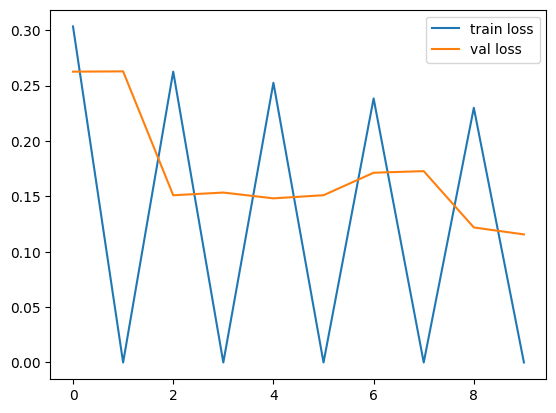

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [34]:
r=model.fit(traning_set,validation_data=test_set,epochs=10,steps_per_epoch=len(traning_set),validation_steps=300)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')